**machine model** - accounts for the difference in implementation and speed on different machines

**worst case** - takes into account different details of the dataset

**asymptotically** - express run time as a function of the problem size.

##Order of Growth
**leading term** is term with highest exponenent.

Sometimes coefficient on leading term or other terms can cause a **crossover point** where a higher order algorithm is faster. For algorithmic analysis purposes though, usually this fact is ignored.

###Exercise 3.1
1.  $n^3$
2.  $n^3$
3.  $af + b$ grows slower than O(g)
4.  $f_1 + f_2$ must grow slower than O(g)
5.  $f_1 + f_2$ grows greater than O(g) and slower than g(h) if h > g.
6.  $f_1 * f_2$ grows faster than both O(h) and O(g)

##Analysis of basic Python operations

*  Basic math operations are constant time, with division taking the longest.  

* Indexing operations take contstat time as well.  `len` is constant as well.

* `min` and `max` are linear.

* slicing is linear with the size of the output (independent of input).

* string concatenation is linear.  the `join` method is linear in the length of the strings though.

* in general, if the body of a for loop is $O(n^a)$, then the whole loop is $O(n^{a+1})$.

*  lists:
    * sorting is O(nlogn).
    * adding or removing elements is constant time.
*  dictionaries: mostly constant
    * copy is proportional to number of elements (not size of elements--because it copies references)
    * update propertional to size of argument
    * keys, values, and items are linear.
    
##Sorting:
* Simple Sorts -  O(n^2)
  * Insertion Sort - sort elements into new list
  * Selection Sort - loop through list for min and swap with first element in place
* Efficient Sorts - O(nlogn)
  *  Merge Sort
  *  Heap Sort - make heap then sort.
  *  Quicksort - choose a pivot point and move all elements greater to right side.  recurse
* Bubble Sort - loop through set, if first element is greater than second element, swap
* Distribution sort - think map reduce


###Exercise 3.2
1.  comparison sort - only reads list elements through single abstract comparison operation that determines which elements should occur first in the final sorted list.  Think of ordering weights using a scale.  Best worst case is O(nlogn)
2.  bubble sort is $n^2$ because you have to cycle through the list n times (if list is completely unsorted).  This is hella slow.
3.  radix sort grows at O(n * k) where n is the number of numbers to sort and k is the max number of digits.
4.  A stable sort is one that produces the same results every time--even if there are multiple possibilities for the correct answer.
5.  Bubble sort and unshuffle sort are both pretty bad.  Cycle is pretty dumb too.
6.  Python uses Timsort, which searches for subsets of the data that are already ordered.  Runs are mered with other runs untill done.  This is pretty fast, because it takes advantage of the fact that a lot of the data is already sorted.  
7.  comparison sorts get used because they are more flexible than other kinds of sorting operations.

##Analysis of search algorithms
**search** takes a collection and a collection and a target and determines whether the target is i the collection, often returning the index o the target.

**linear search** cycles through list.  `in`, `find` and `count` do this.

**bisection search** - O(logn) on sorted list.  How you look a word up in a dictionary.

###Exercise 3.3

In [59]:
def bisection(li, target, low=0, high=None):
    """
    li is a sorted list
    target is the item to search for in li
    """
    n = len(li)
    if high is None: high=len(li)
    guess = high / 2
    
    if target == li[guess]:
        return guess
    elif target > li[guess]:
        return bisection(li, target, low=guess, high=high)
    else:
        return bisection(li, target, low=low, high=guess)
    
    

import random, string
li = [random.choice(string.lowercase) for i in xrange(50)]
li.sort()
# print li
print bisection(li, 'b')


3


##Hashtables

imagine that dictionaries don't exist in python...and you want to implement a data structure that maps keys to values.

* `add(k,v)`: add a new item that maps from key k to value v.
* `get(target)`: look up and return the value that corresponds to key `target`

In [42]:
class LinearMap(object):
    
    def __init__(self):
        self.items = []
    
    def add(self, k, v):
        """constant time"""
       
        self.items.append((k, v))
    
    def get(self, k):
        """linear"""

        for key, val in self.items:
           
            if key == k:
                return val
        raise KeyError
    def __len__(self):
        return len(self.items)

One way to improve is to break key-value pairs into smaller lists.  Still linear `get`, but a step in the right direction.

In [43]:
class BetterMap(object):
    
    def __init__(self, n=100):
        self.maps = []
        for i in range(n):
            self.maps.append(LinearMap())
        
    def find_map(self, k):
        index = hash(k) % len(self.maps)
        return self.maps[index]
    
    def add(self, k, v):
        m = self.find_map(k)
        m.add(k, v)
    
    def get(self, k):
        m = self.find_map(k)
        return m.get(k)
    

The above class's `add` function hashes the key and then puts it into a bin.  the `get` function finds the bin and then does a linear search through the bin.  Since there are 100 evenly spaced bins and the hash function should be spreading things out pretty evenly, we can expect there to be n/100 items in each bucket, so the linear searches should be 100 times faster.

In [44]:
class HashMap(object):
    
    def __init__(self):
        self.maps = BetterMap(2)
        self.num = 0
    
    def get(self, k):
        return self.maps.get(k)
    
    def add(self, k, v):
        if self.num == len(self.maps.maps):
            self.resize()
        
        self.maps.add(k, v)
        self.num += 1
    
    def resize(self):
        new_maps = BetterMap(self.num * 2)
        
        for m in self.maps.maps:
            for k, v in m.items:
                new_maps.add(k, v)
        
        self.maps = new_maps

h = HashMap()
h.add(5,3)
h.add(6,2)
h.add(3,18)
h.get(3)

18

Each add is approximately constant time.  Most of the time, an simply requires a hash operation and an indexing operation.  Every once in a while, but less and less frequently, you have to do a linear resizing operation, but the decreasing frequency with which that happens makes up for the cost of those linear operations, essentially.

###Exercise 3.4
1.  write a `__len__` function for BetterMap and use it in HashMap (to replace accessing attributes of BetterMap directly from HashMap).
2.  use a generator to write BetterMap.iteritems and use it in resize

In [45]:
class BetterMap2(object):
    
    def __init__(self, n=100):
        self.length = 0
        self.maps = []
        for i in range(n):
            self.maps.append(LinearMap())
        
    def find_map(self, k):
        index = hash(k) % len(self.maps)
        return self.maps[index]
    
    def add(self, k, v):
        m = self.find_map(k)
        m.add(k, v)
    
    def get(self, k):
        m = self.find_map(k)
        return m.get(k)
    
    def __len__(self):
        return len(self.maps)
    
    def iteritems(self):
        for m in self.maps:
            yield m
    
# b = BetterMap()
# b.add(8,2)
# b.add(9, 6)
# print len(b)

# iter = b.iteritems()
# print iter.next()
# print iter.next()

In [46]:
class HashMap2(object):
    
    def __init__(self):
        self.maps = BetterMap(2)
        self.num = 0
    
    def get(self, k):
        return self.maps.get(k)
    
    def add(self, k, v):
        if self.num == len(self.maps):
            self.resize()
        
        self.maps.add(k, v)
        self.num += 1
    
    def resize(self):
        new_maps = BetterMap(self.num * 2)
        
        for m in self.maps.maps:
            for k, v in m.items:
                
                new_maps.add(k, v)
        
        self.maps = new_maps
h = HashMap()
h.add(5,3)
h.add(9,19)
h.add(6,2)
h.add(4, 2)
h.get(9)

19

###Exercise 3.5 
write TreeMap which implements a red-black tree to perform add and get in log time.

* binary search tree - data structure where every new element added gets sent either right or left of root node at every node in tree starting at root node.

* in red-black tree: 
    * nodes are red or black and have two chilren
    * root node is black
    * leaves (NIL) are black
    * red nodes have two black children and black parent
    * path from root node to NIL nodes contains same number of black nodes

* insertion:
    1.  add node as in binary search tree. replaces black leaf
    2.  color node red and give two black leaves
    3.  deal with case:
        1. N is is root node
        2. N's parent (P) is black
        3. N's parent (P) and uncle (U) are red
        4. N's parent (P) is red and Uncle (U) is black

In [47]:
class RedBlackTree(object):
    
    def __init__(self):
        self._tree = None
        
    def Insert(self, n):
        if self._tree == None:
            self._tree = RedBlackTreeNode(n)
            self._tree.SetColor("Black")
        else:
            self._tree = self._tree.Insert(n)
    
class RedBlackTreeNode():
    
    def __init__(self, value):
        self._left = None
        self._right = None
        self._value = value
        self.SetColor("Red")
        self._parent = None
    
    def GetParent(self):
        return self._parent
    
    def SetParent(self, parent):
        self._parent = parent
    
    def GetColor(self):
        return self._color
    
    def SetColor(self, color):
        self._color =  color
        
    def GetLeft(self):
        return self._left
    
    def SetLeft(self, left):
        self._left = left
        
    def GetRight(self):
        return self._right
    
    def SetRight(self, right):
        self._right = right
        
    def GetGrandParent(self):
        if self.GetParent() != None:
            return self.GetParent().GetParent()
        else:
            return None
    
    def GetUncle(self):
        grand = self.GetGrandParent()
        if grand is not None:
            if grand.GetLeft() == self.GetParent():
                return grand.GetRight()
            else:
                return grand.GetLeft()
        else:
            return None
        
    def Rebalance(self):
        # case 1: tree root
        if self.GetParent() is None:
            self.SetColor("Black")
            return self
        
        # case 2: parent of the target node is black
        if self.GetParent().GetColor() == "Black":
            return self.GetRoot()
        
        # note: we now know parent is red
        # case 3: self, parent, and uncle are all red
        if self.GetUncle() is not None and self.GetUncle().GetColor() == "Red":
            self.GetUncle().SetColor("Black")
            self.GetParent().SetColor("Black")
            self.GetGrandParent().SetColor("Red")
            return self.GetGrandParent().Rebalance()
        return self.PivotAndRebalance()
    
    def GetRoot(self):
        if self.GetParent() is None:
            return self
        else:
            return self.GetParent().GetRoot()
        
    def PivotAndRebalance(self):
        #distinguish between parent being left child or right child
        if self.GetGrandParent().GetLeft() == self.GetParent():
            if self.GetParent().GetRight() == self:
            # case 4: right child of left parent
                return self.PivotLeft(False)
            
            else:
            # case 5: right child of left parent
                return self.GetParent().PivotRight(True)
        
        else:
            if self.GetParent().GetLeft() == self:
            # case 4: reverse
                return self.PivotRight(False)
            else:
            # case 5: reverse
                return self.GetParent().PivotLeft(True)
    
    def PivotRight(self, recolor):
        left = self.GetLeft()
        right = self.GetRight()
        parent = self.GetParent()
        grand = self.GetGrandParent()
        
        # move right to left of parent
        parent.SetLeft(right)
        if right is not None:
            right.SetParent(parent)
        
        # move up, make parent my right child
        self.SetParent(grand)
        if grand is not None:
            if grand.GetRight(parent) == parent:
                grand.SetRight(self)
            else:
                grand.SetLeft(self)
        self.SetRight(parent)
        parent.SetParent(self)
        if recolor is True:
            parent.setColor("Red")
            self.SetColor("Black")
            return self.getRoot()
        else:
            return parent.Rebalance()
    
    def PivotLeft(self, recolor):
        left = self.GetLeft()
        right = self.GetRight()
        parent = self.GetParent()
        grand = self.GetGrandParent()
        
        # move left to be right of parent
        parent.SetRight(left)
        if left is not None:
            left.SetParent(parent)
        # move up, and make parent my right child
        self.SetParent(grand)
        if grand is not None:
            if grand.GetRight() == parent:
                grand.SetRight(self)
            else:
                grand.SetLeft(self)
        self.SetLeft(parent)
        parent.SetParent(self)
        if recolor is True:
            parent.SetColor("Red")
            self.SetColor("Black")
            return self.GetRoot()
        else:
            return parent.Rebalance()
        
    def Insert(self, value):
        if self._value > value:
            if self.GetLeft() is None:
                self.SetLeft(RedBlackTreeNode(value))
                self.GetLeft().SetParent(self)
                return self.GetLeft().Rebalance()
            else:
                return self.GetLeft().Insert(value)
        else:
            if self.GetRight() is None:
                self.SetRight(RedBlackTreeNode(value))
                self.GetRight().SetParent(self)
                return self.GetRight().Rebalance()
            else:
                return self.GetRight().Insert(value)
b = RedBlackTree()
for i in range(10):
    b.Insert(i)

In [161]:
class RedBlackTreeMap(object):
    
    def __init__(self):
        self._tree = None
        
    def add(self, key, value):
        """
        item is a key, value tuple
        """
        item = key, value
        if self._tree == None:
            self._tree = RedBlackTreeNode(item)
            self._tree.SetColor("Black")
        else:
            self._tree = self._tree.Insert(item)
    
    def get(self, key):
        return self._tree.Find(key)
    
    def Print(self):
        if self._tree == None:
            print "Empty"
        else:
            self._tree.Print(1)
    
class RedBlackTreeNode():
    
    def __init__(self, item):
        key, value = item
        self._left = None
        self._right = None
        self._key = key
        self._value = value
        self.SetColor("Red")
        self._parent = None
    
    def GetParent(self):
        return self._parent
    
    def SetParent(self, parent):
        self._parent = parent
    
    def GetColor(self):
        return self._color
    
    def SetColor(self, color):
        self._color =  color
        
    def GetLeft(self):
        return self._left
    
    def SetLeft(self, left):
        self._left = left
        
    def GetRight(self):
        return self._right
    
    def SetRight(self, right):
        self._right = right
        
    def GetGrandParent(self):
        if self.GetParent() != None:
            return self.GetParent().GetParent()
        else:
            return None
    
    def GetUncle(self):
        grand = self.GetGrandParent()
        if grand is not None:
            if grand.GetLeft() == self.GetParent():
                return grand.GetRight()
            else:
                return grand.GetLeft()
        else:
            return None
        
    def Rebalance(self):
        # case 1: tree root
        if self.GetParent() is None:
            self.SetColor("Black")
            return self
        
        # case 2: parent of the target node is black
        if self.GetParent().GetColor() == "Black":
            return self.GetRoot()
        
        # note: we now know parent is red
        # case 3: self, parent, and uncle are all red
        if self.GetUncle() is not None and self.GetUncle().GetColor() == "Red":
            self.GetUncle().SetColor("Black")
            self.GetParent().SetColor("Black")
            self.GetGrandParent().SetColor("Red")
            return self.GetGrandParent().Rebalance()
        return self.PivotAndRebalance()
    
    def GetRoot(self):
        if self.GetParent() is None:
            return self
        else:
            return self.GetParent().GetRoot()
        
    def PivotAndRebalance(self):
        #distinguish between parent being left child or right child
        if self.GetGrandParent().GetLeft() == self.GetParent():
            if self.GetParent().GetRight() == self:
            # case 4: right child of left parent
                return self.PivotLeft(False)
            
            else:
            # case 5: right child of left parent
                return self.GetParent().PivotRight(True)
        
        else:
            if self.GetParent().GetLeft() == self:
            # case 4: reverse
                return self.PivotRight(False)
            else:
            # case 5: reverse
                return self.GetParent().PivotLeft(True)
    
    def PivotRight(self, recolor):
        left = self.GetLeft()
        right = self.GetRight()
        parent = self.GetParent()
        grand = self.GetGrandParent()
        
        # move right to left of parent
        parent.SetLeft(right)
        if right is not None:
            right.SetParent(parent)
        
        # move up, make parent my right child
        self.SetParent(grand)
        if grand is not None:
            if grand.GetRight(parent) == parent:
                grand.SetRight(self)
            else:
                grand.SetLeft(self)
        self.SetRight(parent)
        parent.SetParent(self)
        if recolor is True:
            parent.setColor("Red")
            self.SetColor("Black")
            return self.getRoot()
        else:
            return parent.Rebalance()
    
    def PivotLeft(self, recolor):
        left = self.GetLeft()
        right = self.GetRight()
        parent = self.GetParent()
        grand = self.GetGrandParent()
        
        # move left to be right of parent
        parent.SetRight(left)
        if left is not None:
            left.SetParent(parent)
        # move up, and make parent my right child
        self.SetParent(grand)
        if grand is not None:
            if grand.GetRight() == parent:
                grand.SetRight(self)
            else:
                grand.SetLeft(self)
        self.SetLeft(parent)
        parent.SetParent(self)
        if recolor is True:
            parent.SetColor("Red")
            self.SetColor("Black")
            return self.GetRoot()
        else:
            return parent.Rebalance()
        
    def Insert(self, item):
        key, value = item
        if self._key > key:
            if self.GetLeft() is None:
                self.SetLeft(RedBlackTreeNode(item))
                self.GetLeft().SetParent(self)
                return self.GetLeft().Rebalance()
            else:
                return self.GetLeft().Insert(item)
        else:
            if self.GetRight() is None:
                self.SetRight(RedBlackTreeNode(item))
                self.GetRight().SetParent(self)
                return self.GetRight().Rebalance()
            else:
                return self.GetRight().Insert(item)
        
    def Print(self, indent):
        for i in range(indent):
            print "   ",
        print "%s: %s (%s)" % (self._key, self._value, self.GetColor())
        if self.GetLeft() is None:
            for i in range(indent + 1):
                print "   ",
            print "None(Black)"
        else:
            self.GetLeft().Print(indent + 1)
        if self.GetRight() is None:
            for i in range(indent +1):
                print "  ",
            print "None(Black)"
        else:
            self.GetRight().Print(indent + 1)
    
    def Find(self, key):
        if self._key == key:
            return self._value
        elif self._key > key:
            if self.GetLeft() is None:
                raise KeyError
            return self.GetLeft().Find(key)
        else:
            if self.GetRight() is None:
                raise KeyError
            return self.GetRight().Find(key)
        
        
b = RedBlackTreeMap()
for i in range(10):
    b.add(i,i)
b.add([4,3],"waffles")
b.get([4,3])

'waffles'

My solution is a slightly modified version of the code in [this blog post.](http://scienceblogs.com/goodmath/2008/05/28/the-basic-balanced-search-tree/)

Timing Things

if a process is quadratic, then we expect the time to relate to n like so:
$$
\log{t} \sim \log{a} + 2\log{n}
$$
so if we plot t versus n on a log-log scale, we expect a straight line with slope 2.  If it's linear, we expect a slope of 1.

In [65]:
import os

def etime():
    """See how much user and system time this process has used
    so far and return the sum"""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

start = etime()

# put the code you want to measure here

end = etime()
elapsed = end - start
print elapsed

0.0


In [50]:
result = %timeit -n1 -o print 'hello'
print 'best:',result.best

hello
hello
hello
1 loops, best of 3: 37 µs per loop
best: 3.69548797607e-05


In [157]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def time_map_add(map_type, low=1000, high=100000, n=50):
    to_time = map_type()
    
    # set up map
    for i in xrange(low):
        to_time.add(i, i)
    
    # capture results:
    times = []
    for i in xrange(low, high):
        start = etime()
        to_time.add(i, i)
        
        end = etime()
        result = end - start
        times.append(result)
    
    return range(low, high), times

def time_map_get(map_type, low=3, high=3, n=50):
    to_time = map_type()
    ns = np.logspace(low, high, n)
    
    times = []
    index = 0
    
    for n in ns:
        n = int(n)
        while index < n: 
            to_time.add(index, index)
            index += 1
        
        start = etime()
        to_time.get(n-1)
        end = etime()
        result = end - start
        
        times.append(result)
    
    return ns, times
    

In [153]:
def plot_map(map_type, map_func, ax, title='', scale='log'):
    ns, ts = map_func(map_type)
    if scale=='log':
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_xlabel('n')
    ax.set_ylabel('run time (s)')
    ax.set_title(title)
    ax.plot(ns, ts)


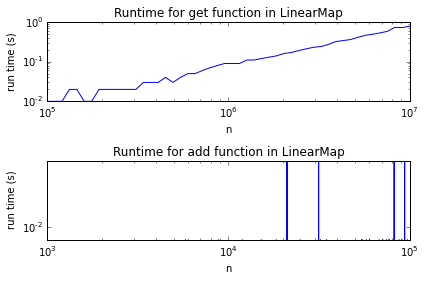

In [154]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plot_map(LinearMap, time_map_get, ax[0], 
         title="Runtime for get function in LinearMap")
plot_map(LinearMap, time_map_add, ax[1],
         title="Runtime for add function in LinearMap")
fig.tight_layout()
plt.show()

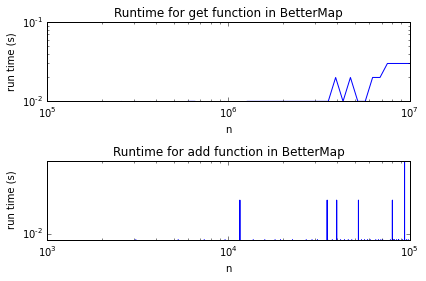

In [155]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plot_map(BetterMap, time_map_get, ax[0], 
         title="Runtime for get function in BetterMap")
plot_map(BetterMap, time_map_add, ax[1],
         title="Runtime for add function in BetterMap")
fig.tight_layout()
plt.show()

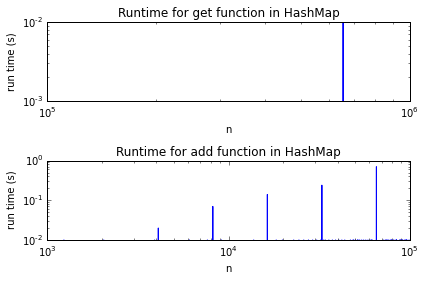

In [158]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plot_map(HashMap, time_map_get, ax[0], 
         title="Runtime for get function in HashMap")
plot_map(HashMap, time_map_add, ax[1],
         title="Runtime for add function in HashMap")
fig.tight_layout()
plt.show()

ValueError: Data has no positive values, and therefore can not be log-scaled.

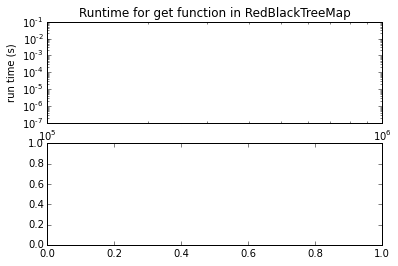

In [162]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plot_map(RedBlackTreeMap, time_map_get, ax[0], 
         title="Runtime for get function in RedBlackTreeMap")
plot_map(RedBlackTreeMap, time_map_add, ax[1],
         title="Runtime for add function in RedBlackTreeMap")
fig.tight_layout()
plt.show()

##List Comprehensions
traverse a list while building a new one